# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [1]:
#import packages
from random import choices
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# this function represents the game
def monty():
    all_doors = list(np.arange(1,4))
    
    # randomly generate which door has the car behind it and what the player selection is 
    # this is WITH replacement so both door_with_car and player_selection could be the same
    door_with_car, player_selection = choices(all_doors,k=2)
    
    if door_with_car != player_selection:  # this accounts for cases where player initially picks one of the goats
        all_doors.remove(door_with_car)
        all_doors.remove(player_selection)
        show_door = all_doors[0]
        
    if door_with_car == player_selection:  # this accounts for cases where player initially picks the door with the car
        all_doors.remove(player_selection)
        show_door = choices(all_doors,k=1)[0]
        
    return door_with_car, player_selection, show_door

In [3]:
# this function represents what happens when the player changes her mind
def change_mind():
    all_doors = list(np.arange(1,4)) # initialise all_doors again
    all_doors.remove(player_selection) # because the player has changed her mind and so must move on from original selection
    all_doors.remove(show_door) # the player is not going to select a goat
    
    # therefore, what remains as the new choice is what the player didn't pick initially and hasn't been shown to have a goat
    new_choice = all_doors[0] 
    return new_choice


In [4]:
# simulate the game of the player not changing her mind.
# let's call this strategy, to stick

games_played = list(np.arange(100,10000,100))
stick_prob_dict = { } # this will store the number of games played in each simulation as the key, with win probability as the value

for n in games_played:
    win_count = 0
    for j in range(n):
        door_with_car,player_selection,show_dooro = monty()
        if door_with_car == player_selection: # this is the bit where the player sticks
            win_count += 1
    win_prob = win_count/n
    stick_prob_dict.update({n: win_prob})

stick_df = pd.DataFrame.from_dict(stick_prob_dict, orient='index', columns=['win_prob'])
stick_df.columns.name = 'games'

In [5]:
# simulate the game of the player constantly changing her mind.
# let's call this strategy, to twist

# this will be a list of the number of games played in EACH SIMULATION, starting at 100 and ending at 10000
# each simulation will have a 100 extra games from the previous simulation
# this results in 99 simulations in total

games_played = list(np.arange(100,10000,100))
twist_prob_dict = { } # this will store the number of games played in each simulation as the key, with win probability as the value

for n in games_played:
    win_count = 0 #initialise a variable to count the number of wins
    for j in range(n):
        door_with_car, player_selection, show_door = monty()
        new_door = change_mind()
        if door_with_car == new_door:
            win_count += 1    
    win_prob = win_count/n
    twist_prob_dict.update({n: win_prob})

twist_df = pd.DataFrame.from_dict(twist_prob_dict, orient='index', columns=['win_prob'])
twist_df.columns.name = 'games'

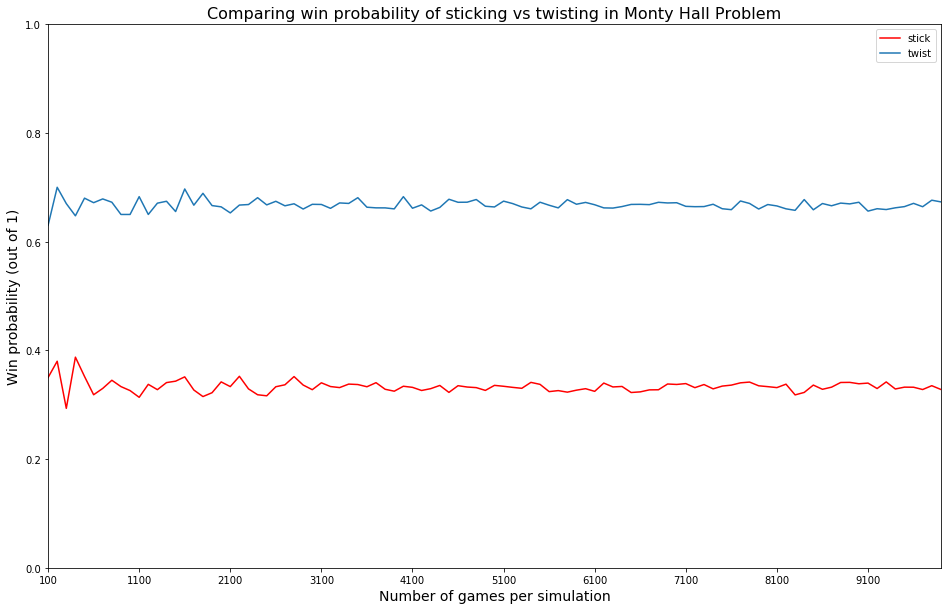

In [10]:
plt.figure(figsize=(16,10))
ax= plt.gca()
stick_df.plot(kind='line',y ='win_prob', ax=ax, color ='red', label='stick')
twist_df.plot(kind='line',y ='win_prob', ax=ax, label='twist')
plt.ylim(0,1)
plt.xticks(np.arange(100,10000,1000))
plt.xlabel('Number of games per simulation', size=14)
plt.ylabel('Win probability (out of 1)', size=14)
plt.title('Comparing win probability of sticking vs twisting in Monty Hall Problem', size=16)
plt.show()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 